<a href="https://colab.research.google.com/github/Shrishti-2701/supervised-machine-learning/blob/main/mltask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPERVISED ML TASK-1** 

IMPORTING DEPENDIES

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [57]:
# loading the data from csv file to pandas dataframe
sh = pd.read_csv('http://bit.ly/w-data')
# inspecting the first 10 rows of the dataframe
sh.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# checking the number of rows and columns
sh.shape

(25, 2)

In [6]:
# getting some information about the dataset
sh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# checking the number of missing values
sh.isnull().sum()

Hours     0
Scores    0
dtype: int64

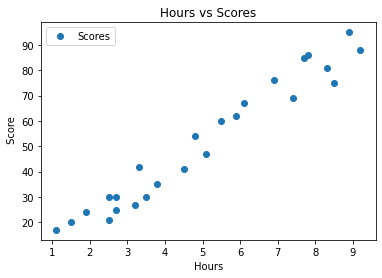

In [58]:
# Plotting the distribution of scores
sh.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel(' Score')  
plt.show()

In [59]:
#Preparing the data
X = sh.iloc[:, :-1].values  
Y = sh.iloc[:, 1].values
print(X.shape)
Y.shape

(25, 1)


(25,)

Splitting training and test data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

Model Training

In [61]:
## loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
print(lin_reg_model)


LinearRegression()


In [62]:
# Plotting the regression line
line = lin_reg_model.coef_*X+lin_reg_model.intercept_



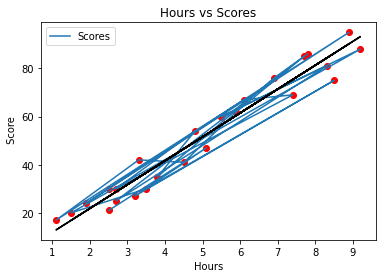

In [63]:
# Plotting for the test data
sh.plot(x='Hours', y='Scores')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel(' Score')  
plt.scatter(X, Y,color='red')
plt.plot(X, line,color='black');
plt.show()

In [64]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_test)

In [65]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Hours': Y_test, 'Predicted Hours': training_data_prediction})  
df 

,Actual Hours,Predicted Hours
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


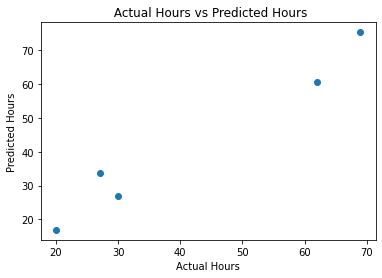

In [66]:
plt.scatter(Y_test, training_data_prediction)
plt.xlabel("Actual Hours")
plt.ylabel("Predicted Hours")
plt.title(" Actual Hours vs Predicted Hours")
plt.show()

In [67]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_train)

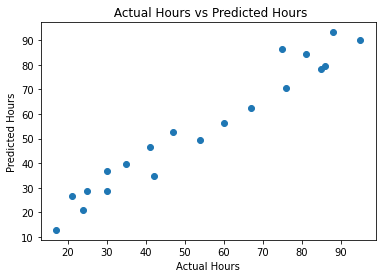

In [68]:
plt.scatter(Y_train, test_data_prediction)
plt.xlabel("Actual Hours")
plt.ylabel("Predicted Hours")
plt.title(" Actual Hours vs Predicted Hours")
plt.show()

In [69]:
#testing with our own data
#Value1
hours = 9.25
predictedscore = lin_reg_model.predict([[hours]])
print("No of Hours=",hours)
print("Predicted Score=",predictedscore[0])


#Value2
hours = 10.25
predictedscore = lin_reg_model.predict([[hours]])
print("No of Hours=",hours)
print("Predicted Score=",predictedscore[0])

No of Hours= 9.25
Predicted Score= 93.69173248737539
No of Hours= 10.25
Predicted Score= 103.60238896801764


Finding Absolute Error

In [74]:
from sklearn.metrics  import mean_absolute_error ,mean_squared_error
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, training_data_prediction))


Mean Absolute Error: 4.183859899002982
